# Zomato shelling dataset EDA And Feature Engineering  

## Cleaning and Preparing data

In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering

In [3]:
#Read Dataset
df = pd.read_csv('zomato.csv' , encoding='latin-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
#All columes
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
# All columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
#Statical Analysis
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

# Obersvation:
--> Did analytic analysis
    
    > count
    > mean
    > std
    > min
    > 25 %
    > 50 %
    > 75 %
    > max (outlayers)
    



# IN DATA ANALYSIS WHAT ALL THINGS WE DO :-


    1. MISIING VALUES
    2. EXPLORING ABOUT THE NUMERICAL VARIABLES
    3. EXPLORING ABOUT CATEGORICAL VARIABLES
    4. FINDING RELATIONSHIP BETWEEN FEATURES

In [50]:
# identifying all missing value
df.isnull().head()

Restaurant ID  Restaurant Name  Country Code   City  Address  Locality  \
0          False            False         False  False    False     False   
1          False            False         False  False    False     False   
2          False            False         False  False    False     False   
3          False            False         False  False    False     False   
4          False            False         False  False    False     False   

   Locality Verbose  Longitude  Latitude  Cuisines  ...  Currency  \
0             False      False     False     False  ...     False   
1             False      False     False     False  ...     False   
2             False      False     False     False  ...     False   
3             False      False     False     False  ...     False   
4             False      False     False     False  ...     False   

   Has Table booking  Has Online delivery  Is delivering now  \
0              False                False              False   
1              False                False              False   
2              False                False              False   
3              False                False              False   
4              False                False              False   

   Switch to order menu  Price range  Aggregate rating  Rating color  \
0                 False        False             False         False   
1                 False        False             False         False   
2                 False        False             False         False   
3                 False        False             False         False   
4                 False        False             False         False   

   Rating text  Votes  
0        False  False  
1        False  False  
2        False  False  
3        False  False  
4        False  False  

[5 rows x 21 columns]

In [58]:
df.shape

(9542, 21)

In [51]:
# Checking null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## Only cuisines have missing  some data points 

In [59]:
# drop null values

df.dropna(inplace=True)

In [56]:
df.shape

(9542, 21)

In [60]:
df['Cuisines'].isnull()
# df['Cuisines'].value_counts()

# df = pd.DataFrame(df)

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Cuisines, Length: 9542, dtype: bool

In [57]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.shape

(9551, 21)

In [10]:
# checking duplicate values
df.duplicated().sum()

0

In [11]:
[features for features in df.columns if df[features].isnull().sum() >0]

['Cuisines']

In [14]:
# Reading country code file

dfc = pd.read_excel('Country-Code.xlsx')
# dfc.head()
dfc

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In [49]:
# merge country code value

final = pd.merge(df , dfc , on='Country Code' , how = 'left')
final.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

In [16]:
final.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [17]:
country_names = final.Country.value_counts()

In [18]:
country_names = final.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [19]:
country_val = final.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x1f93315a530>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

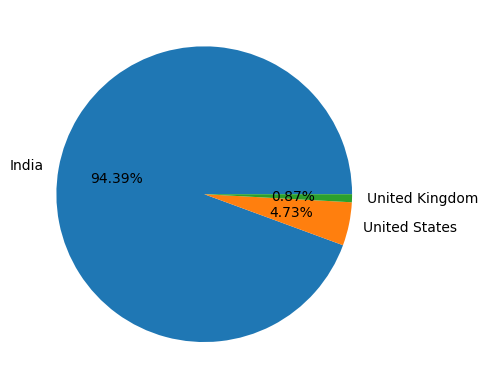

In [20]:
# pie chart of top 3 countries
plt.pie(country_val[:3] , labels= country_names[:3] , autopct='%1.2f%%')

### Observation : 
        
        India use maximum zomato app. 
        After that USA and then UK is using zomato

In [21]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [22]:
df.groupby(['Aggregate rating' ,'Rating color', 'Rating text', ])

In [23]:
df.groupby(['Aggregate rating' ,'Rating color', 'Rating text', ]).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [24]:
df.groupby(['Aggregate rating' ,'Rating color', 'Rating text', ]).size().reset_index()

Aggregate rating Rating color Rating text     0
0                0.0        White   Not rated  2148
1                1.8          Red        Poor     1
2                1.9          Red        Poor     2
3                2.0          Red        Poor     7
4                2.1          Red        Poor    15
5                2.2          Red        Poor    27
6                2.3          Red        Poor    47
7                2.4          Red        Poor    87
8                2.5       Orange     Average   110
9                2.6       Orange     Average   191
10               2.7       Orange     Average   250
11               2.8       Orange     Average   315
12               2.9       Orange     Average   381
13               3.0       Orange     Average   468
14               3.1       Orange     Average   519
15               3.2       Orange     Average   522
16               3.3       Orange     Average   483
17               3.4       Orange     Average   498
18               3.5       Yellow        Good   480
19               3.6       Yellow        Good   458
20               3.7       Yellow        Good   427
21               3.8       Yellow        Good   400
22               3.9       Yellow        Good   335
23               4.0        Green   Very Good   266
24               4.1        Green   Very Good   274
25               4.2        Green   Very Good   221
26               4.3        Green   Very Good   174
27               4.4        Green   Very Good   144
28               4.5   Dark Green   Excellent    95
29               4.6   Dark Green   Excellent    78
30               4.7   Dark Green   Excellent    42
31               4.8   Dark Green   Excellent    25
32               4.9   Dark Green   Excellent    61

TO RENAME ANY COLUMN

In [25]:
ratings = df.groupby(['Aggregate rating' ,'Rating color', 'Rating text', ]).size().reset_index().rename(columns={0:'Rating Count'})
ratings.head()

Aggregate rating Rating color Rating text  Rating Count
0               0.0        White   Not rated          2148
1               1.8          Red        Poor             1
2               1.9          Red        Poor             2
3               2.0          Red        Poor             7
4               2.1          Red        Poor            15

OBSERVATION :->

    1. WHEN RATING IS BETWEEN 4.5 TO 4.9 --> EXCELLENT
    2. WHEN RATING IS BETWEEN 4.0 TO 4.4 --> VERY GOOD
    3. WHEN RATING IS BETWEEN 3.5 TO 3.9 --> GOOD
    4. WHEN RATING IS BETWEEN 2.5 TO 3.4 --> AVERAGE
    5. WHEN RATING IS BETWEEN 1.8 TO 2.4 --> POOR

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

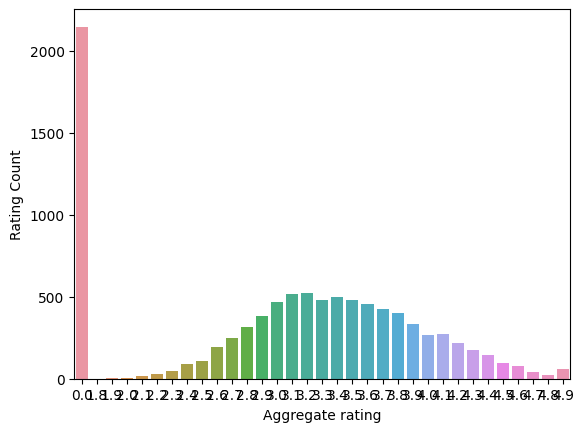

In [26]:
sns.barplot(x = "Aggregate rating" , y= "Rating Count" , data = ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

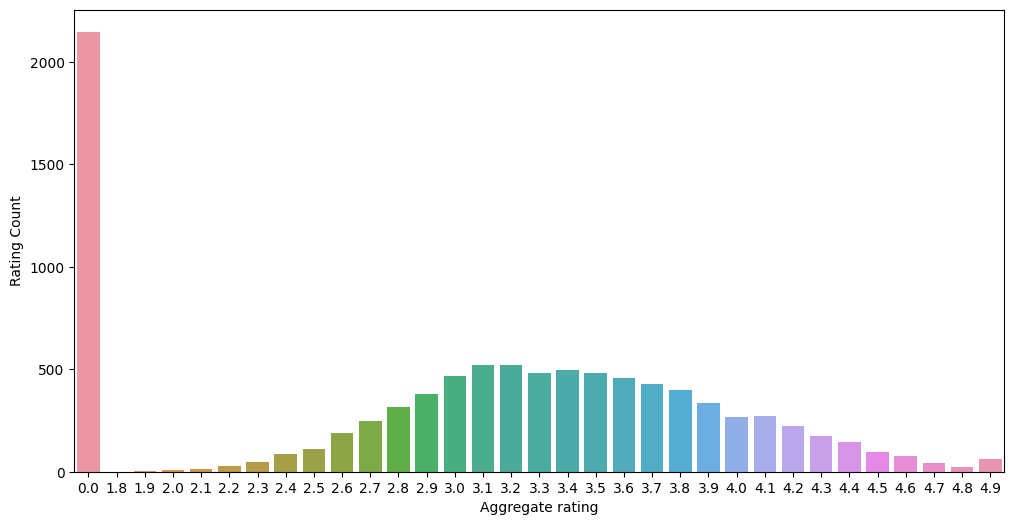

In [27]:
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x = "Aggregate rating" , y= "Rating Count" , data = ratings)


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

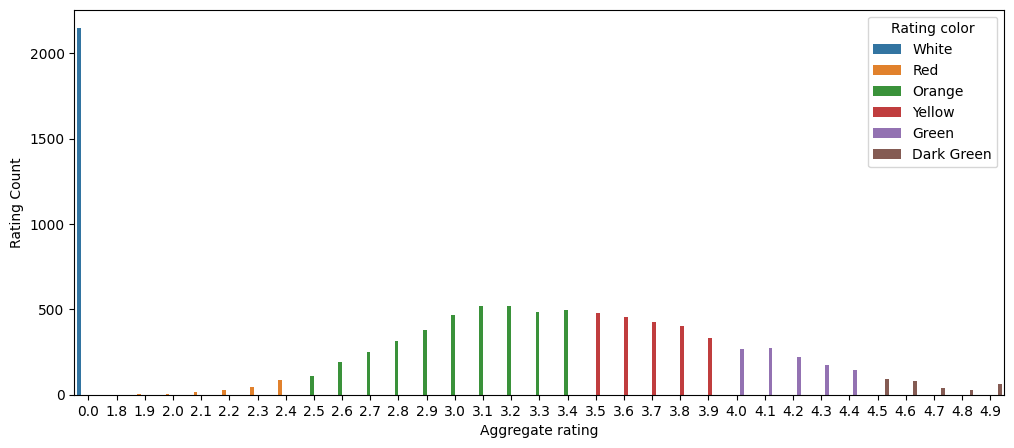

In [28]:
plt.rcParams['figure.figsize'] = (12,5)
sns.barplot(x = "Aggregate rating" ,hue=('Rating color') ,y= "Rating Count" , data = ratings)


WE CAN OVERRIDE COLOR

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

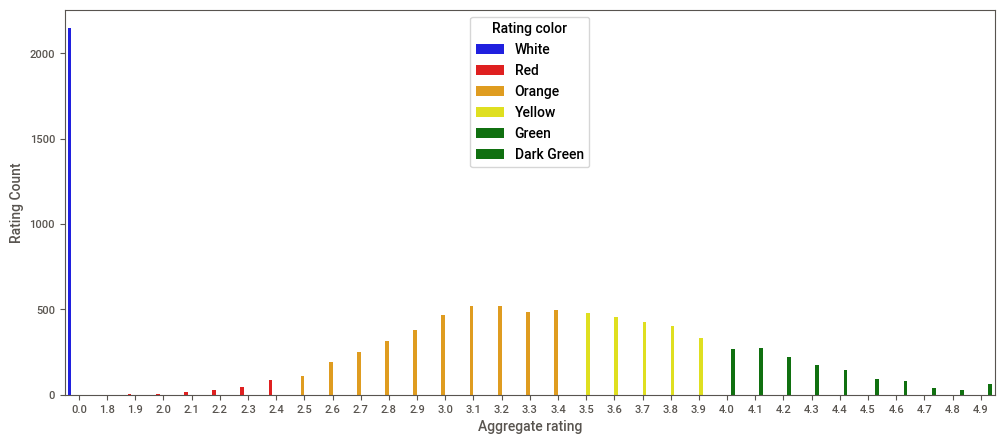

In [65]:
# bar plot b/t Aggregate rating & Rating count 

plt.rcParams['figure.figsize'] = (12,5)
sns.barplot(x = "Aggregate rating" ,hue=('Rating color') ,y= "Rating Count" , data = ratings , palette=['blue','red' , 'orange','yellow','green','green'])


OBSERVATION :-->

    1. Many of the people doesn't give any rating to app
    2. Maximum rating numbers are between 2.5 to 3.9 

<Axes: xlabel='Rating color', ylabel='count'>

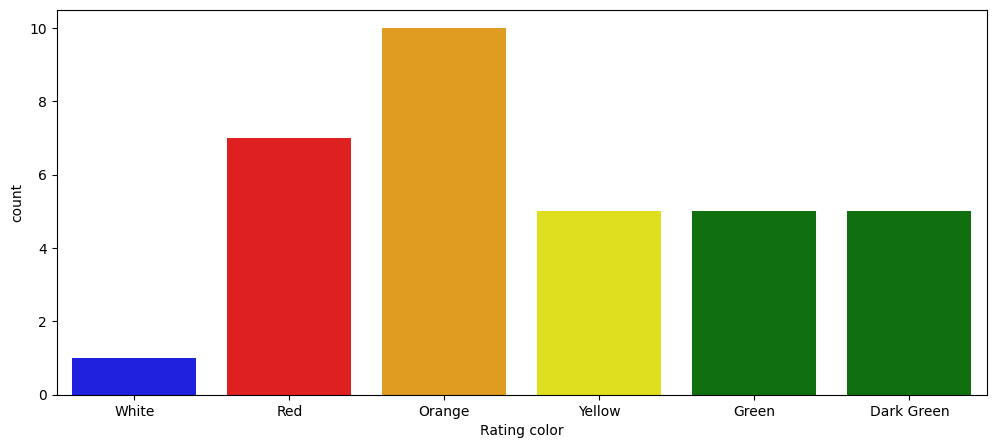

In [30]:
# Count plot

sns.countplot( x ='Rating color' , data = ratings , palette=['blue','red' , 'orange','yellow','green','green'])

In [31]:
dfc2 = final.groupby(['Aggregate rating' ,'Rating color', 'Country','Rating text']).size().reset_index().rename(columns={0:'Rating count'})
dfc2

Aggregate rating Rating color         Country Rating text  Rating count
0                 0.0        White          Brazil   Not rated             5
1                 0.0        White           India   Not rated          2139
2                 0.0        White  United Kingdom   Not rated             1
3                 0.0        White   United States   Not rated             3
4                 1.8          Red           India        Poor             1
..                ...          ...             ...         ...           ...
217               4.9   Dark Green       Sri Lanka   Excellent             1
218               4.9   Dark Green          Turkey   Excellent             3
219               4.9   Dark Green             UAE   Excellent             4
220               4.9   Dark Green  United Kingdom   Excellent             4
221               4.9   Dark Green   United States   Excellent            14

[222 rows x 5 columns]

<Axes: xlabel='Country', ylabel='Aggregate rating'>

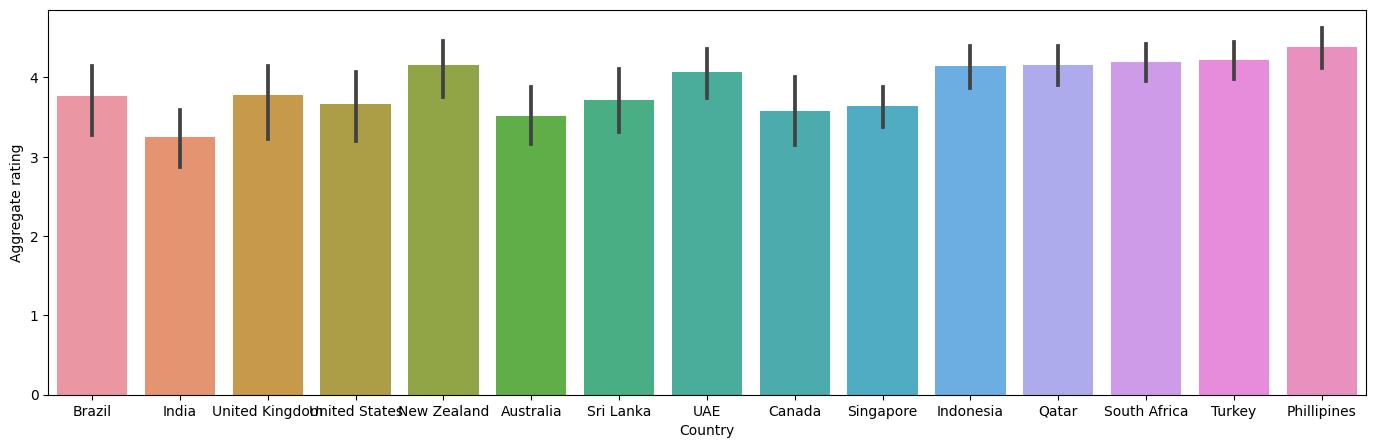

In [32]:
plt.rcParams['figure.figsize'] = (17,5)
sns.barplot(y='Aggregate rating' , x='Country' , data=dfc2)

In [33]:
# how many country gives 0 rating


final[final['Rating color']=='White'].groupby('Country').size().reset_index()

Country     0
0          Brazil     5
1           India  2139
2  United Kingdom     1
3   United States     3

OBSERVATION :

    1. Maximum 0 ratings are given by Indian Customers

In [34]:
final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [35]:
# Which currency is used by which country

curr = final.groupby(['Country' ,'Currency']).size().reset_index()
curr

Country                Currency     0
0        Australia               Dollar($)    24
1           Brazil      Brazilian Real(R$)    60
2           Canada               Dollar($)     4
3            India      Indian Rupees(Rs.)  8652
4        Indonesia  Indonesian Rupiah(IDR)    21
5      New Zealand           NewZealand($)    40
6      Phillipines        Botswana Pula(P)    22
7            Qatar         Qatari Rial(QR)    20
8        Singapore               Dollar($)    20
9     South Africa                 Rand(R)    60
10       Sri Lanka   Sri Lankan Rupee(LKR)    20
11          Turkey        Turkish Lira(TL)    34
12             UAE      Emirati Diram(AED)    60
13  United Kingdom              Pounds(£)    80
14   United States               Dollar($)   434

In [36]:
# Which country has online delevery

OD = final.groupby(['Country' ,'Has Online delivery']).size().reset_index()
OD

Country Has Online delivery     0
0        Australia                  No    24
1           Brazil                  No    60
2           Canada                  No     4
3            India                  No  6229
4            India                 Yes  2423
5        Indonesia                  No    21
6      New Zealand                  No    40
7      Phillipines                  No    22
8            Qatar                  No    20
9        Singapore                  No    20
10    South Africa                  No    60
11       Sri Lanka                  No    20
12          Turkey                  No    34
13             UAE                  No    32
14             UAE                 Yes    28
15  United Kingdom                  No    80
16   United States                  No   434

OBSERVATION :-

    1.India and UAE has online delivery.

In [37]:
# Create a pie chart for top 5 cities distribution

final.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [38]:
city_values = final.City.value_counts().values
city_labels = final.City.value_counts().index

([<matplotlib.patches.Wedge at 0x1f935caa290>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

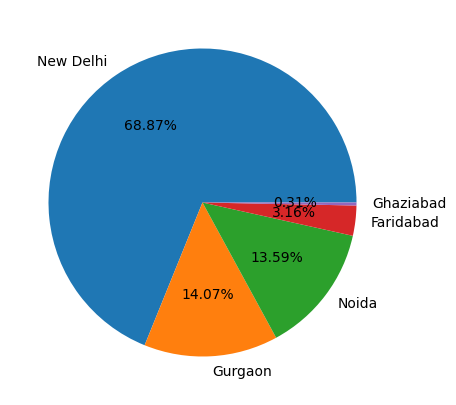

In [39]:
plt.pie(city_values[:5] , labels=city_labels[:5] , autopct='%1.2f%%')

OBSERVATION :-

    1. New Delhi has done maximum transition all over the world

In [62]:
# importing a automated EDA library

import sweetviz as sv

zomato = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

c:\Users\thede\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 140 (\x8c) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\thede\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 140 (\x8c) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)


In [64]:
zomato.show_html('zomatosweetviz.html')

Report zomatosweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# From Our Observation :-
#### India is Biggest market of Zomato
#### India Uses Maximum Zomato app
#### In India New Delhi has done maximum transition all over the world
#### India and UAE has online delivery mode 
#### Maximum 0 (Zero) rating also given by Indian costumers to Zomato app
#### Maximum rating numbers are between 2.5 to 3.9
#### App's Popularity also know from the rating which is given by the costumer
#### Can also see which currency is used by different countries


# So these Details are helping us to Understand the market and cosumer mind set
